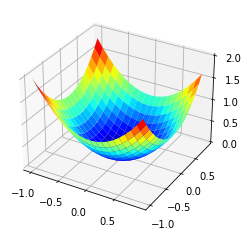

In [4]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
 
# objective function
def objective(x, y):
    return x**2.0 + y**2.0
 
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

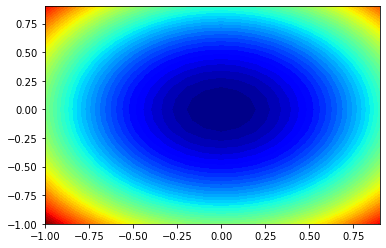

In [15]:
from numpy import asarray

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()

In [16]:

# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

In [19]:
from numpy.random import rand
from numpy.random import seed

solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])


In [38]:
solution

array([-0.43690091, -0.62697164])

In [40]:
# gradient descent algorithm with nesterov momentum
def nesterov(objective, derivative, bounds, n_iter, step_size, momentum):
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # list of changes made to each variable
    change = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent
    for it in range(n_iter):
        # calculate the projected solution
        projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
        # calculate the gradient for the projection
        gradient = derivative(projected[0], projected[1])
        # build a solution one variable at a time
        new_solution = list()
        for i in range(solution.shape[0]):
            # calculate the change
            change[i] = (momentum * change[i]) - step_size * gradient[i]
            # calculate the new position in this variable
            value = solution[i] + change[i]
            # store this variable
            new_solution.append(value)
        # evaluate candidate point
        solution = asarray(new_solution)
        solution_eval = objective(solution[0], solution[1])
        # report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return [solution, solution_eval]

In [41]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with nesterov momentum
best, score = nesterov(objective, derivative, bounds, n_iter, step_size, momentum)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.13276479  0.35251919]) = 0.14190
>1 f([-0.09824595  0.2608642 ]) = 0.07770
>2 f([-0.07031223  0.18669416]) = 0.03980
>3 f([-0.0495457   0.13155452]) = 0.01976
>4 f([-0.03465259  0.0920101 ]) = 0.00967
>5 f([-0.02414772  0.06411742]) = 0.00469
>6 f([-0.01679701  0.04459969]) = 0.00227
>7 f([-0.01167344  0.0309955 ]) = 0.00110
>8 f([-0.00810909  0.02153139]) = 0.00053
>9 f([-0.00563183  0.01495373]) = 0.00026
>10 f([-0.00391092  0.01038434]) = 0.00012
>11 f([-0.00271572  0.00721082]) = 0.00006
>12 f([-0.00188573  0.00500701]) = 0.00003
>13 f([-0.00130938  0.0034767 ]) = 0.00001
>14 f([-0.00090918  0.00241408]) = 0.00001
>15 f([-0.0006313   0.00167624]) = 0.00000
>16 f([-0.00043835  0.00116391]) = 0.00000
>17 f([-0.00030437  0.00080817]) = 0.00000
>18 f([-0.00021134  0.00056116]) = 0.00000
>19 f([-0.00014675  0.00038964]) = 0.00000
>20 f([-0.00010189  0.00027055]) = 0.00000
>21 f([-7.07505806e-05  1.87858067e-04]) = 0.00000
>22 f([-4.91260884e-05  1.30440372e-04]) = 0.00000
>23 f